### Environment Setup 

In [1]:

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format
import env

In [2]:
import wrangle

from wrangle import wrangle_video_games, split, seperate_y, scale_data, split_seperate_scale

### Data Wrangle

In [3]:
df = wrangle_video_games()

In [4]:
df = wrangle.remove_dup_columns(df)

In [5]:
df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Shooter,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T
447,PS3,2007,Role-Playing,1.69,0.85,0.14,0.43,3.10,93.00,45.00,...,0,0,0,0,0,0,0,1,0,0
450,X360,2010,Role-Playing,1.99,0.81,0.03,0.27,3.10,96.00,98.00,...,0,0,0,0,0,0,0,1,0,0
459,X360,2012,Shooter,1.89,0.88,0.04,0.25,3.05,89.00,59.00,...,1,0,0,0,0,0,0,1,0,0
461,X360,2008,Action,1.91,0.84,0.00,0.29,3.04,75.00,42.00,...,0,0,0,0,0,0,1,0,0,0
462,X360,2012,Role-Playing,1.94,0.84,0.03,0.24,3.04,93.00,74.00,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.shape

(7311, 46)

In [7]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_seperate_scale(df)

In [8]:
train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Shooter,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T
9854,PS2,2003,Action,0.06,0.05,0.00,0.02,0.12,65.00,19.00,...,0,0,0,0,0,0,0,1,0,0
1478,X360,2013,Platform,0.86,0.34,0.00,0.12,1.32,83.00,37.00,...,0,0,0,0,0,0,1,0,0,0
1114,PS3,2007,Action,0.57,0.72,0.06,0.29,1.65,79.00,64.00,...,0,0,0,0,0,0,0,0,0,1
1846,WiiU,2013,Strategy,0.44,0.32,0.29,0.07,1.11,87.00,79.00,...,0,0,0,1,0,0,1,0,0,0
1982,PS2,2003,Sports,0.51,0.40,0.00,0.13,1.04,81.00,22.00,...,0,0,1,0,0,1,0,0,0,0


In [9]:
train.shape

(4093, 46)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4093 entries, 9854 to 7390
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         4093 non-null   object 
 1   Year_of_Release  4093 non-null   int64  
 2   Genre            4093 non-null   object 
 3   NA_Sales         4093 non-null   float64
 4   EU_Sales         4093 non-null   float64
 5   JP_Sales         4093 non-null   float64
 6   Other_Sales      4093 non-null   float64
 7   Global_Sales     4093 non-null   float64
 8   Critic_Score     4093 non-null   float64
 9   Critic_Count     4093 non-null   float64
 10  User_Score       4093 non-null   float64
 11  Rating           4093 non-null   object 
 12  3DS              4093 non-null   uint8  
 13  DC               4093 non-null   uint8  
 14  DS               4093 non-null   uint8  
 15  GBA              4093 non-null   uint8  
 16  GC               4093 non-null   uint8  
 17  PC         

In [11]:
train.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,3DS,...,Shooter,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T
count,"4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00",...,"4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00"
mean,"2,007.19",0.23,0.12,0.02,0.04,0.41,68.03,25.14,7.16,0.02,...,0.11,0.04,0.15,0.04,0.00,0.35,0.14,0.18,0.00,0.33
std,4.10,0.30,0.17,0.06,0.06,0.48,13.75,17.78,1.32,0.13,...,0.31,0.20,0.35,0.19,0.00,0.48,0.35,0.38,0.02,0.47
min,"1,992.00",0.00,0.00,0.00,0.00,0.01,19.00,3.00,0.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,004.00",0.05,0.01,0.00,0.01,0.09,59.00,11.00,6.70,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,007.00",0.12,0.04,0.00,0.02,0.22,70.00,21.00,7.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,010.00",0.29,0.15,0.00,0.05,0.53,79.00,35.00,8.10,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,"2,016.00",1.99,0.99,0.39,0.76,3.10,97.00,104.00,9.60,1.00,...,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


# Exploration

In [12]:
import explore

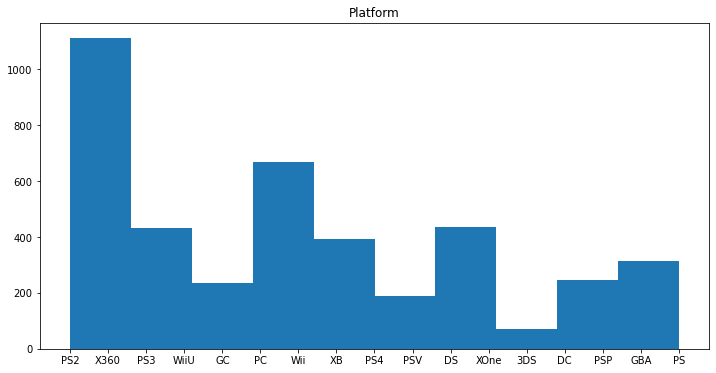

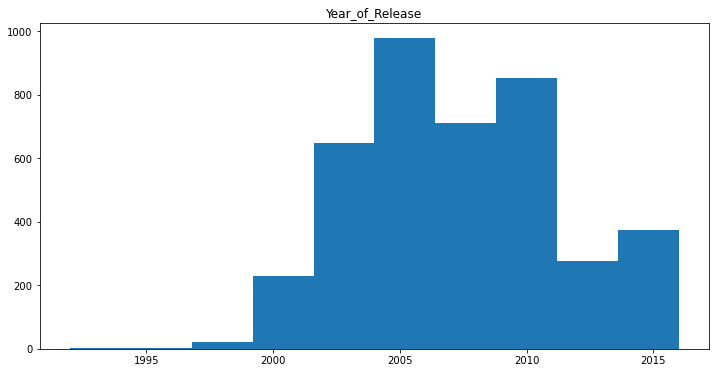

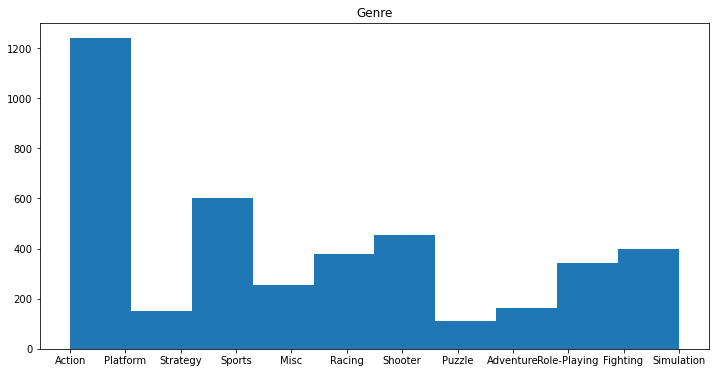

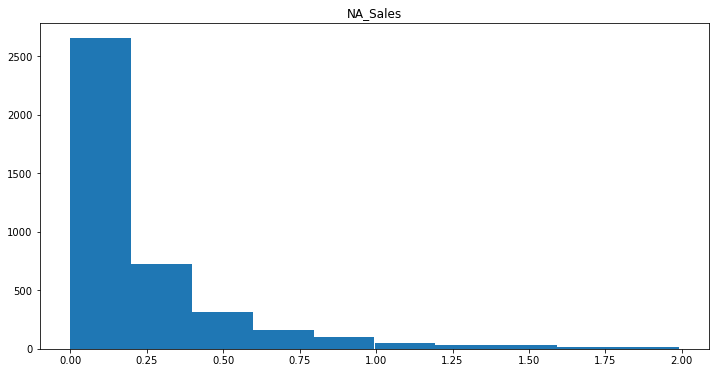

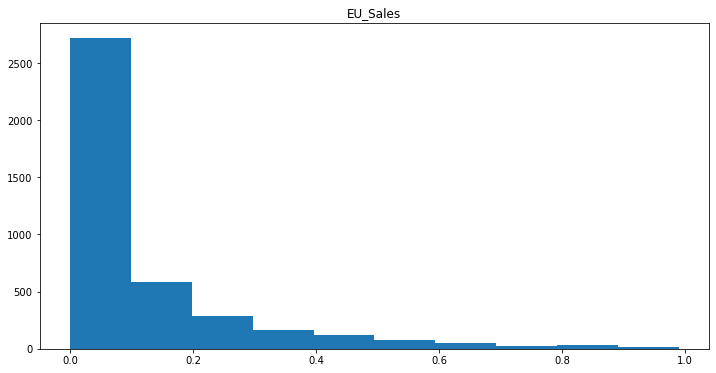

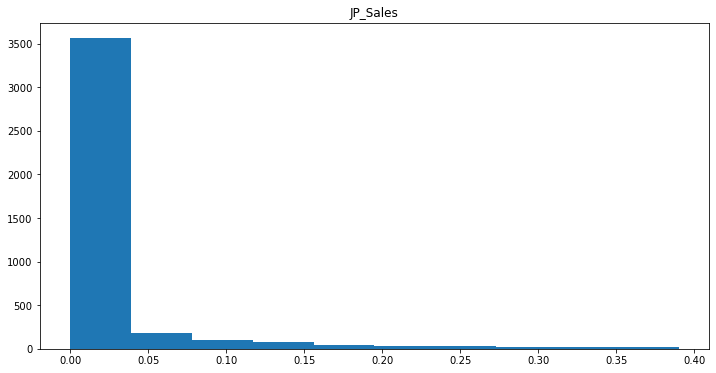

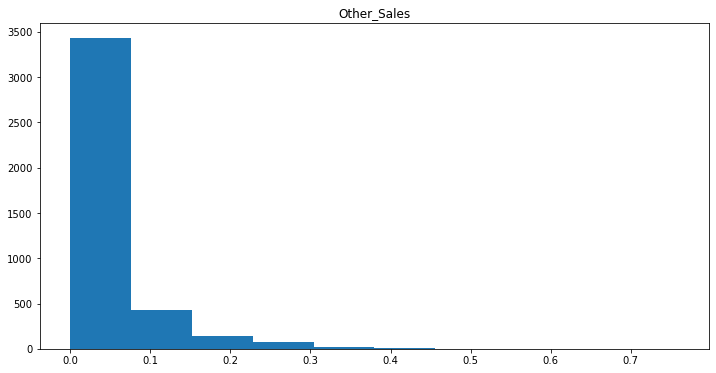

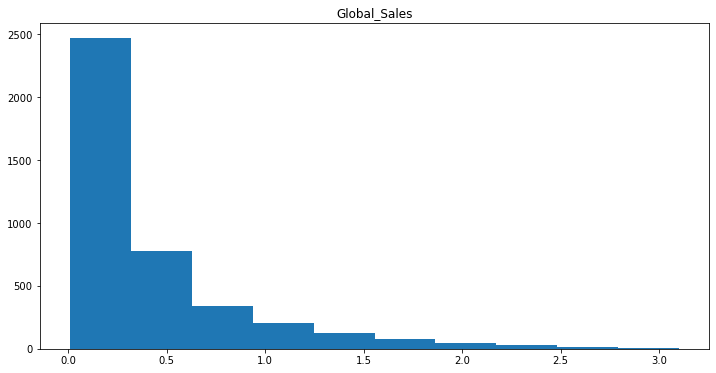

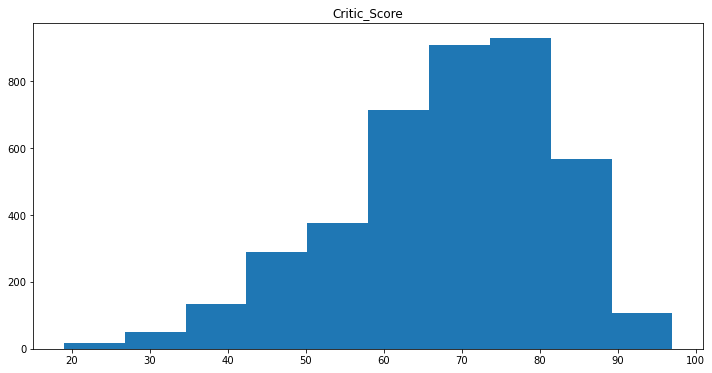

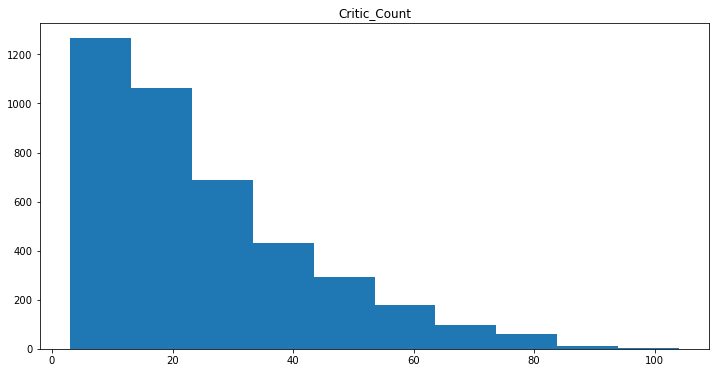

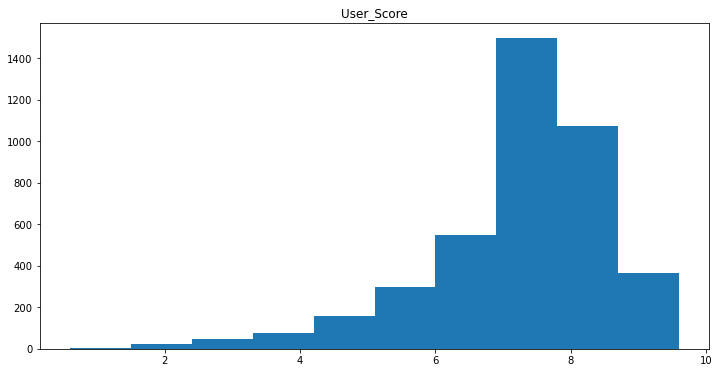

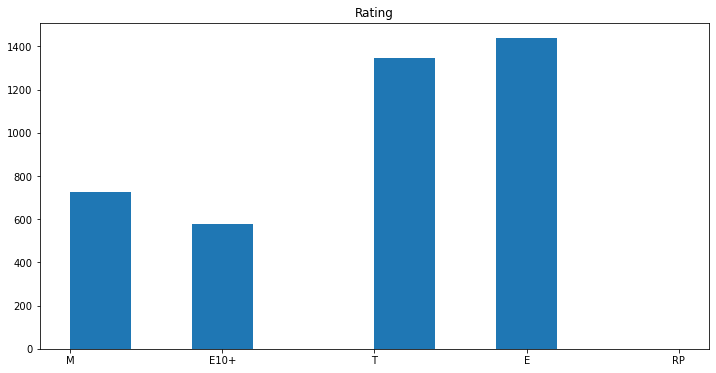

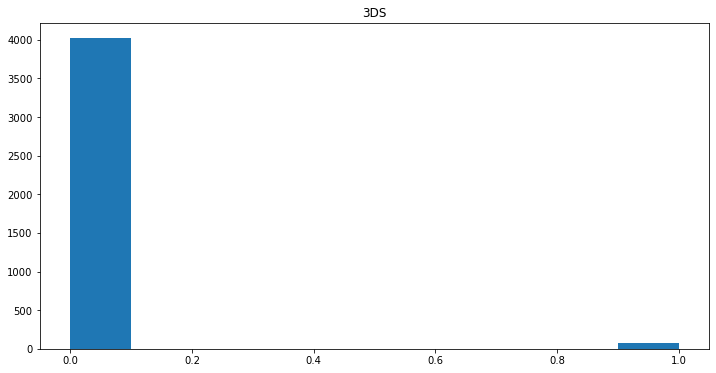

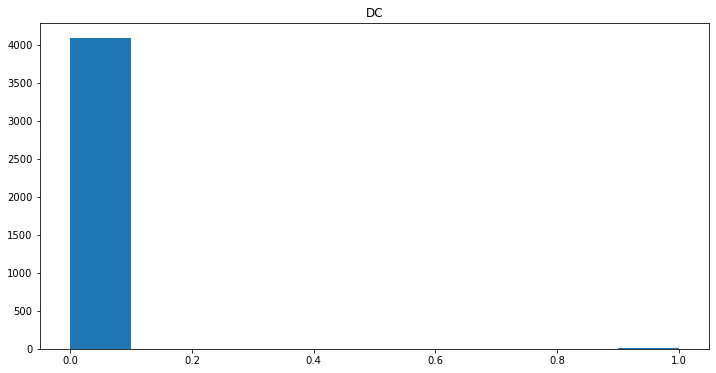

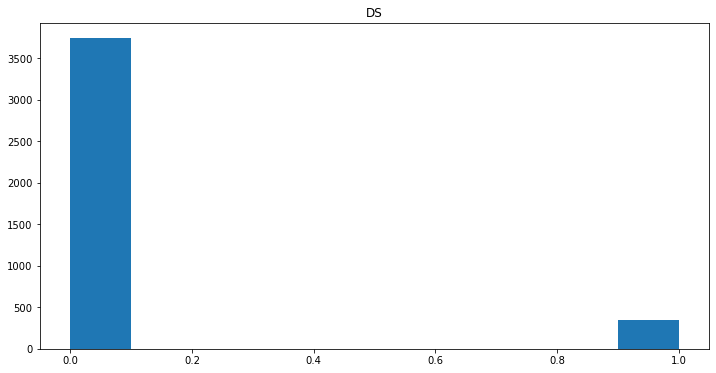

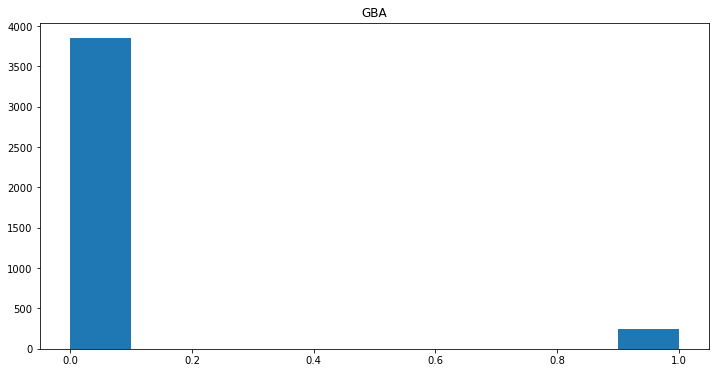

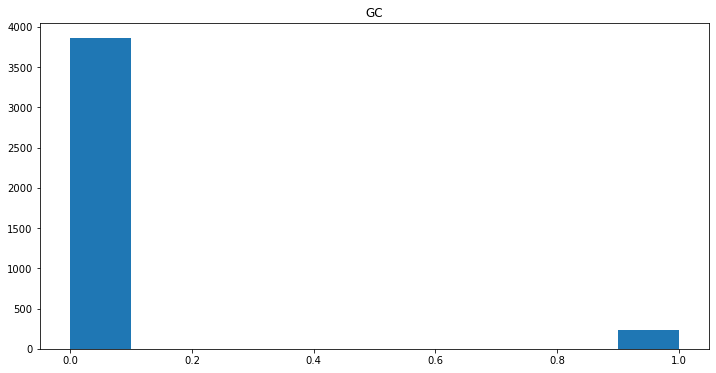

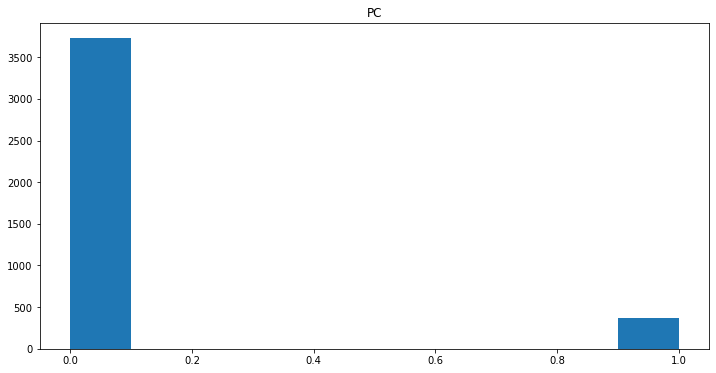

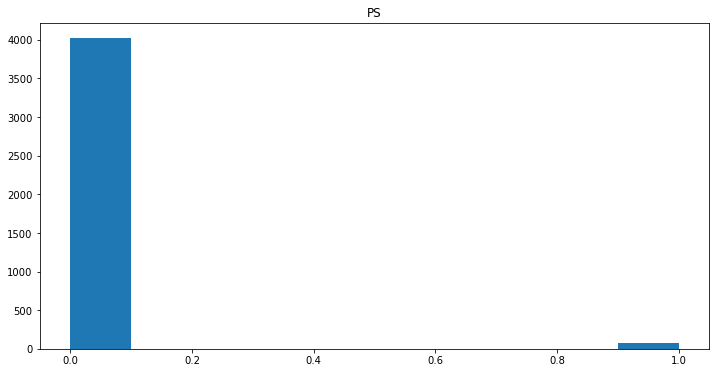

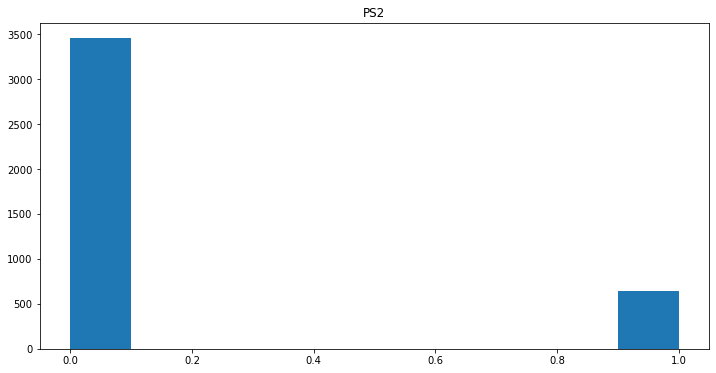

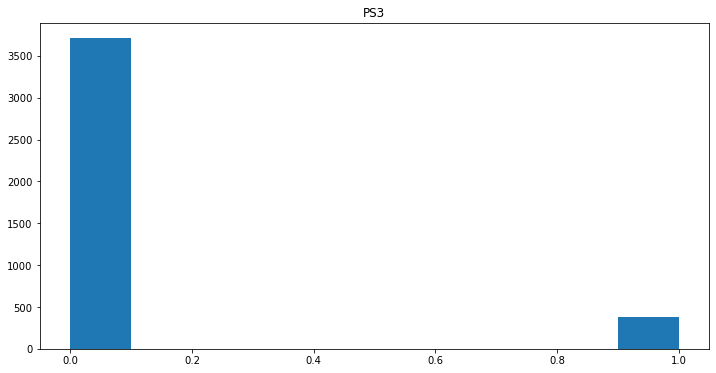

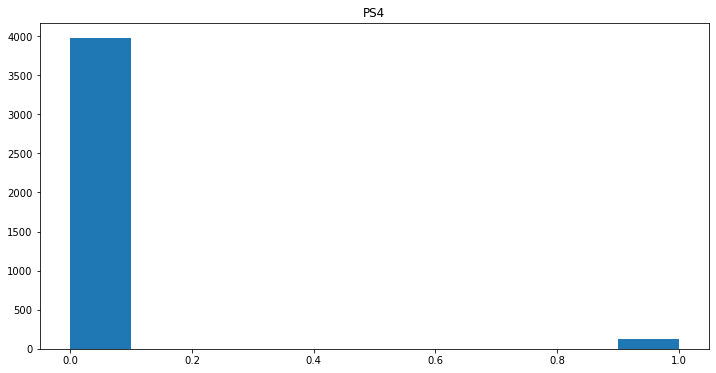

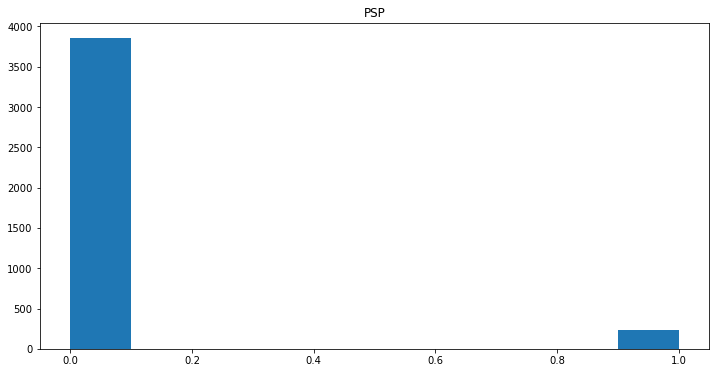

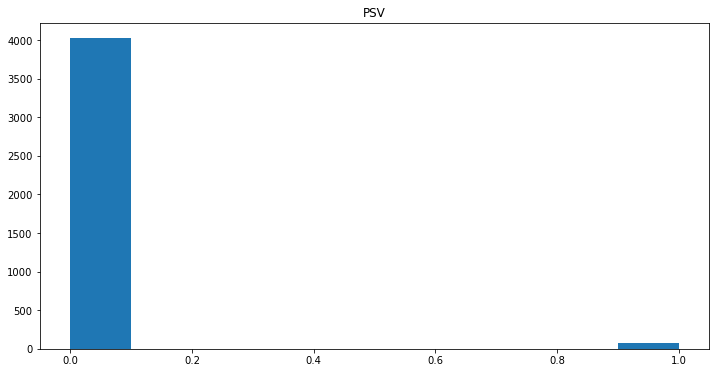

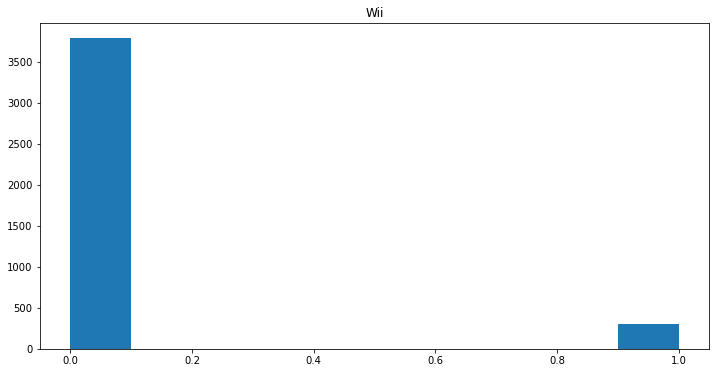

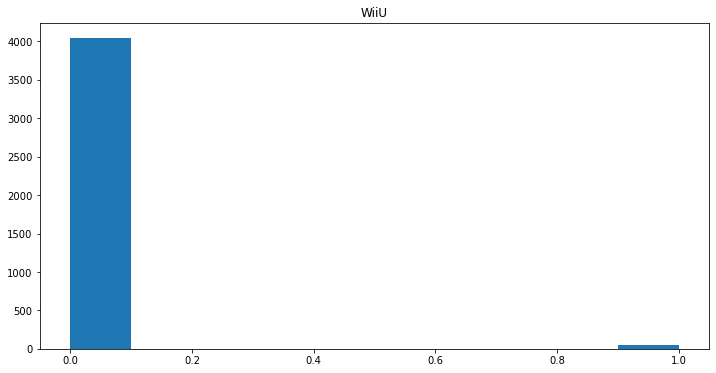

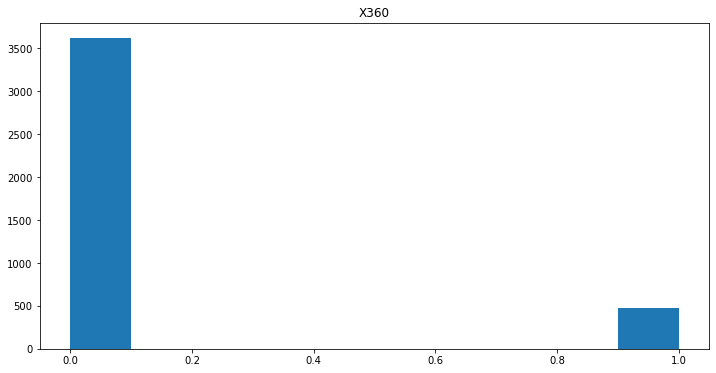

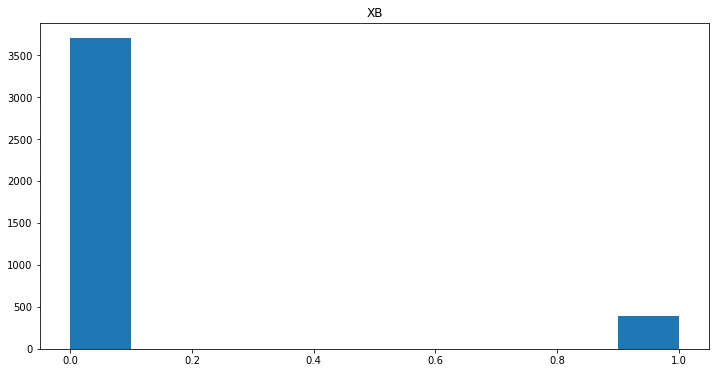

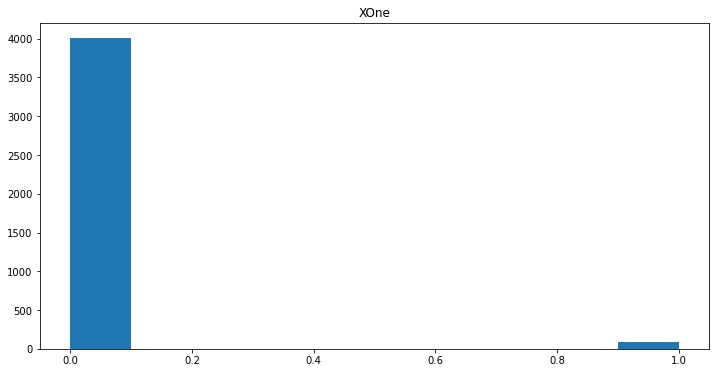

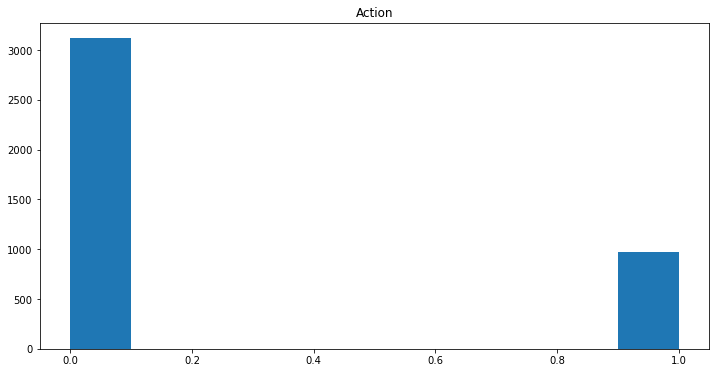

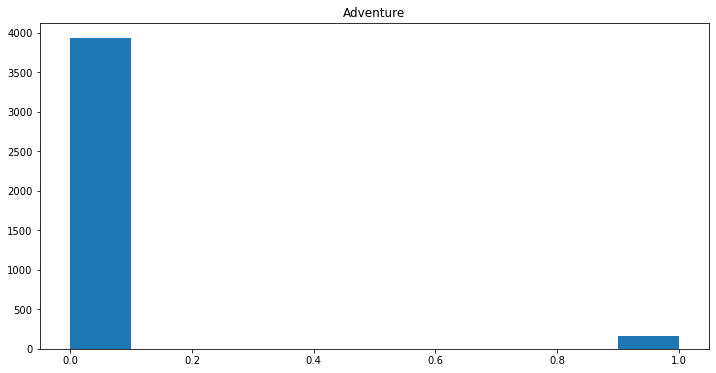

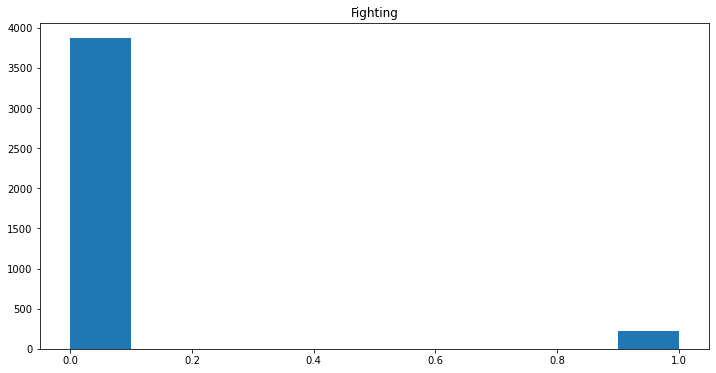

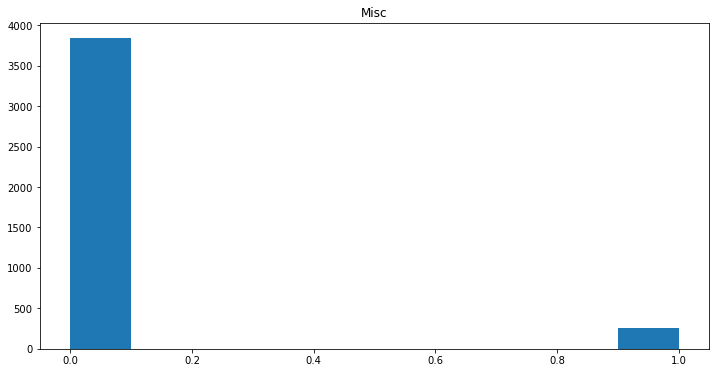

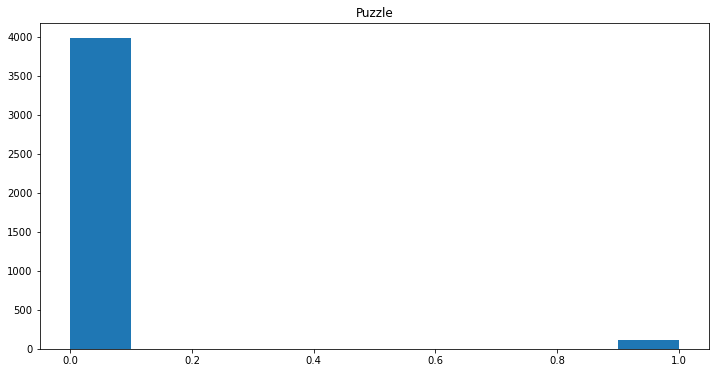

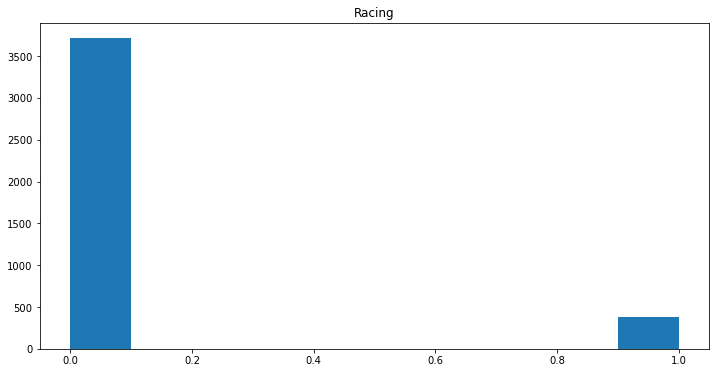

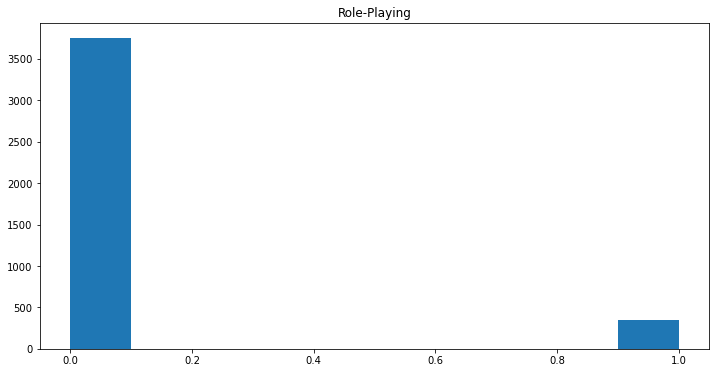

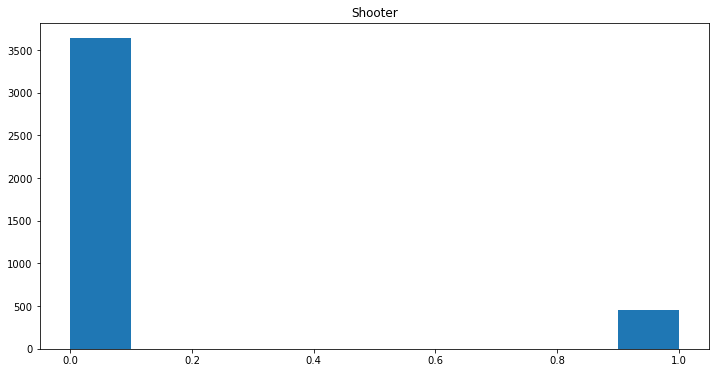

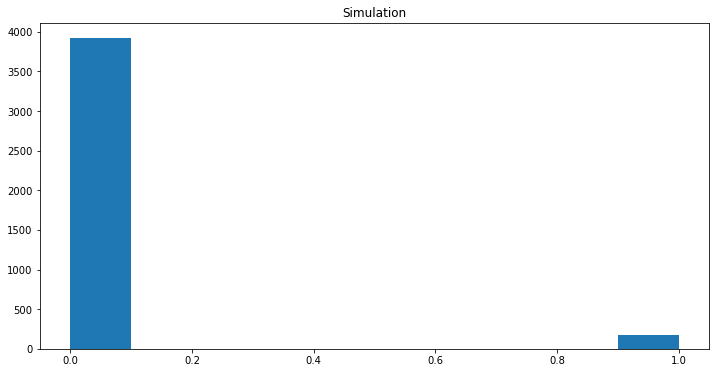

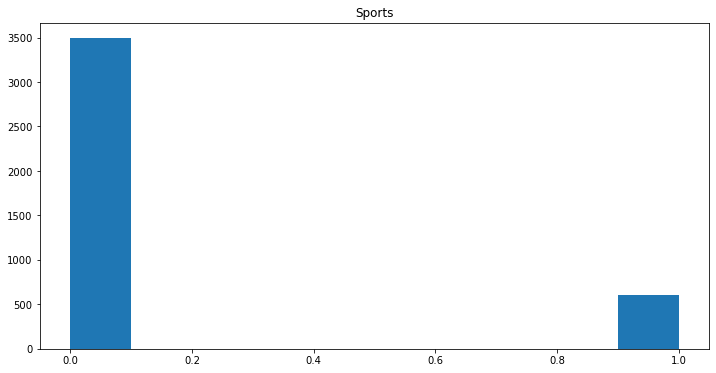

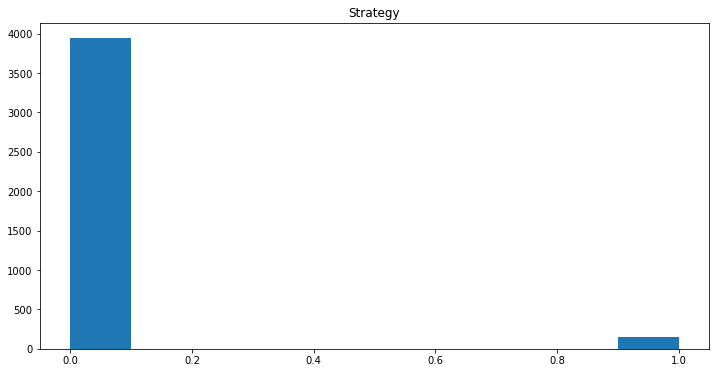

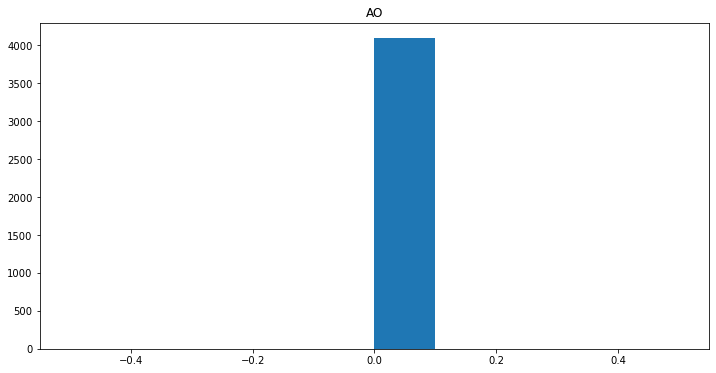

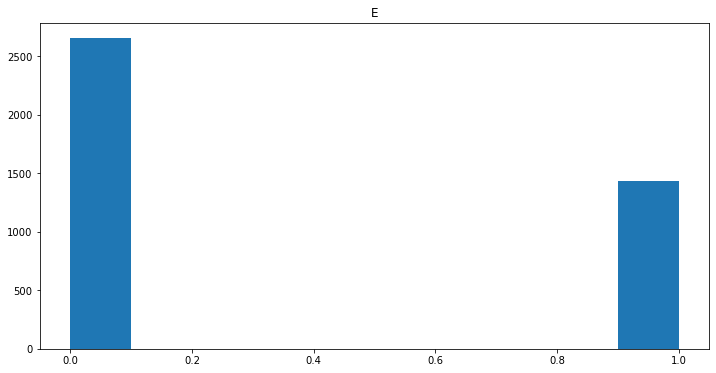

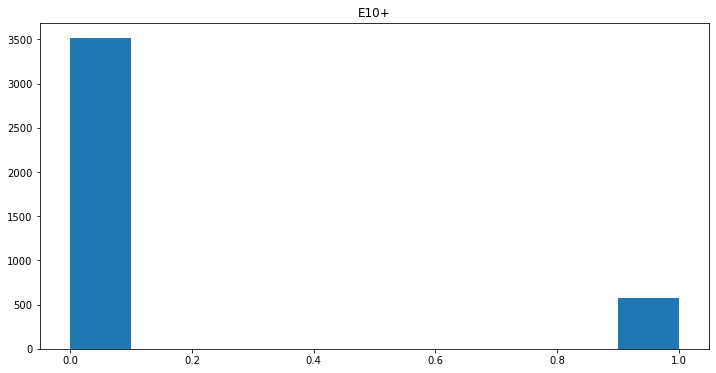

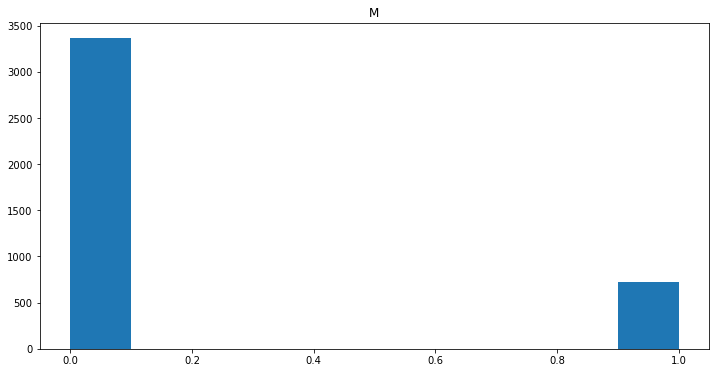

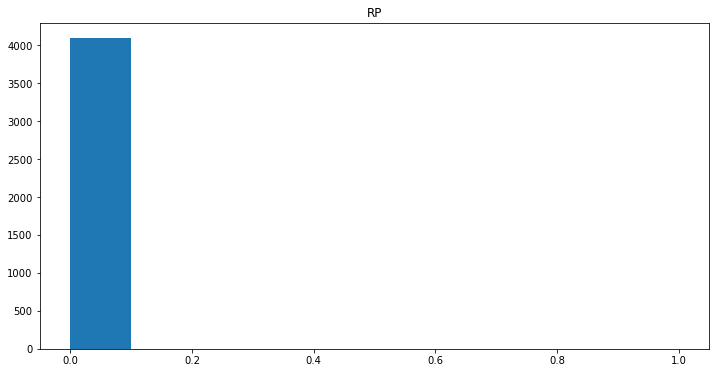

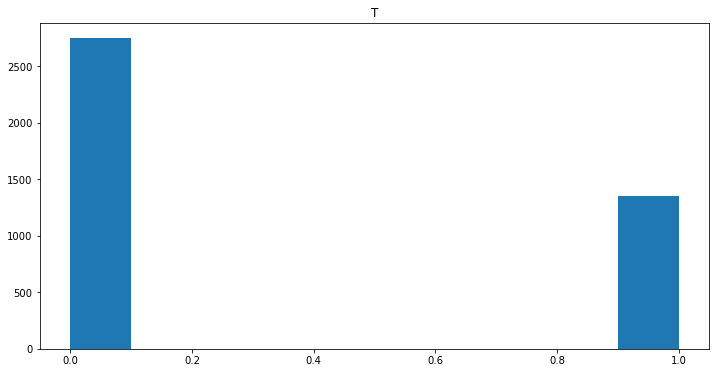

In [13]:
for col in train.columns:
    plt.figure(figsize=(12,6))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Takeaways

- Most games were released after year 2000

- Most games appear to be in the Action Genre

- Sales numbers may have extreme outliers 

- Critic Score, the target, appears to be distributed normally, but skewed to the left

- Critic count is heavily skewed to the right

- User Score appears to resemble Critic Score, also skewed to the left

- Most games were rated E or T by the ESRB

- Many dummy variables don't seem to account for very much of the data, they shouldn't be considered 

# Q1

## What is the distribution of total sales across various markets?

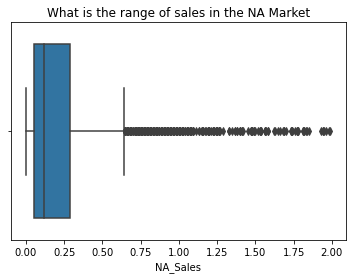

In [14]:
sns.boxplot(train.NA_Sales)
plt.title("What is the range of sales in the NA Market")
plt.show()

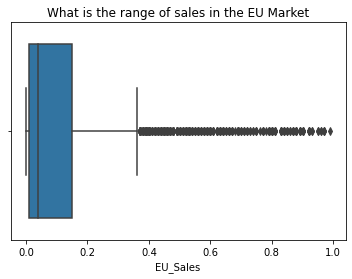

In [15]:
sns.boxplot(train.EU_Sales)
plt.title("What is the range of sales in the EU Market")
plt.show()

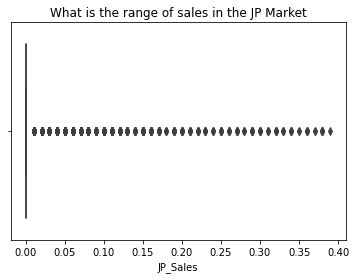

In [16]:
sns.boxplot(train.JP_Sales)
plt.title("What is the range of sales in the JP Market")
plt.show()

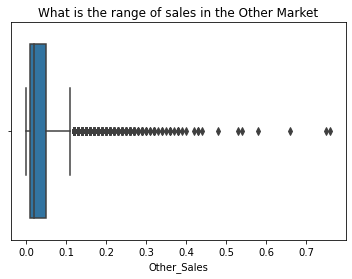

In [17]:
sns.boxplot(train.Other_Sales)
plt.title("What is the range of sales in the Other Market")
plt.show()

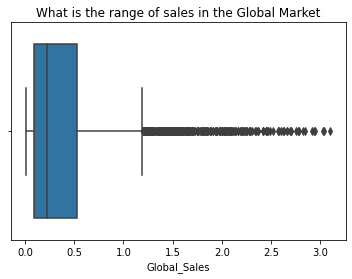

In [18]:
sns.boxplot(train.Global_Sales)
plt.title("What is the range of sales in the Global Market")
plt.show()

## Takeaways

- Japan has too many outliers, may need to be removed 

- Most games have less than 1 million sales total

# Q2

## What is the distribution of Critic Score across Genres?

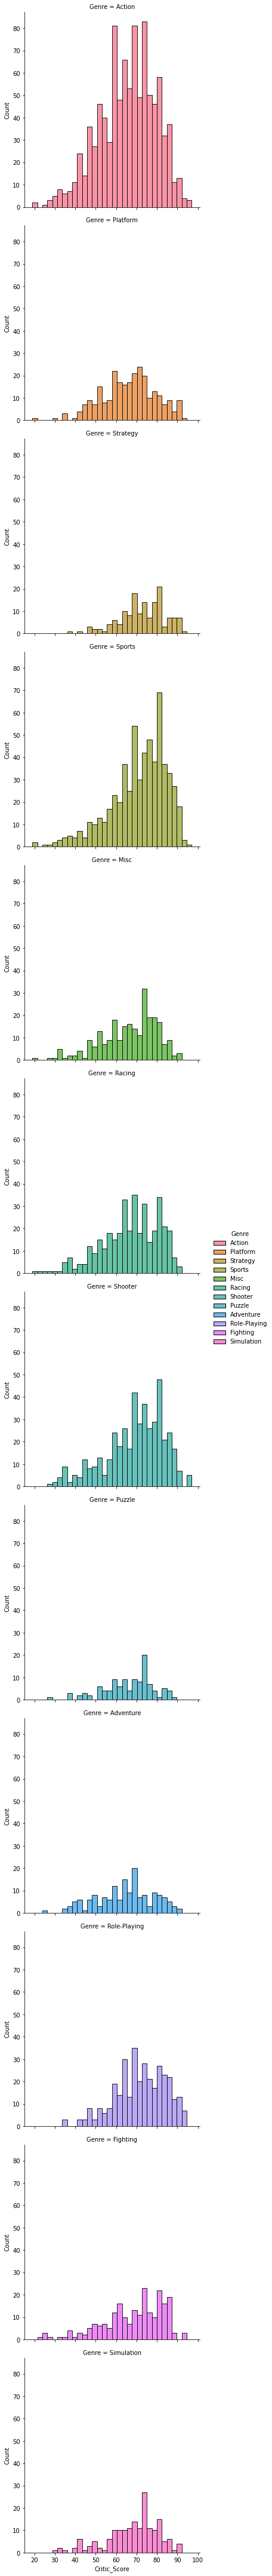

In [24]:
sns.displot(data = train, x = 'Critic_Score', hue = 'Genre', row = 'Genre')

In [43]:
H0 = 'There is no significant differnce in Critic Score of Sports games and the general population'

H1 = 'There is a significant difference between the Critic Score of Sports games and the general population'

alpha = .05

In [45]:
from math import sqrt

In [46]:
sports_games = train[train.Genre == 'Sports']

μ = train.Critic_Score.mean()
xbar = sports_games.Critic_Score.mean()
s = sports_games.Critic_Score.std()
n = sports_games.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(5.295919648140732, 1.6653223832625913e-07)

In [47]:
if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

There is a significant difference between the Critic Score of Sports games and the general population


## Takeaways

- Action is by far the largest genre, but the games are normally distributed as far as critic score

- Sports is skewed heavily to the left, indicating most sports games have high scores
    - There is a significant difference in Sports games and the general population

- Shooter, Role playing, and Fighting also skewed slightly to the left 



# Q3

## What is the distribution of Critic Score across ESRB Rating?

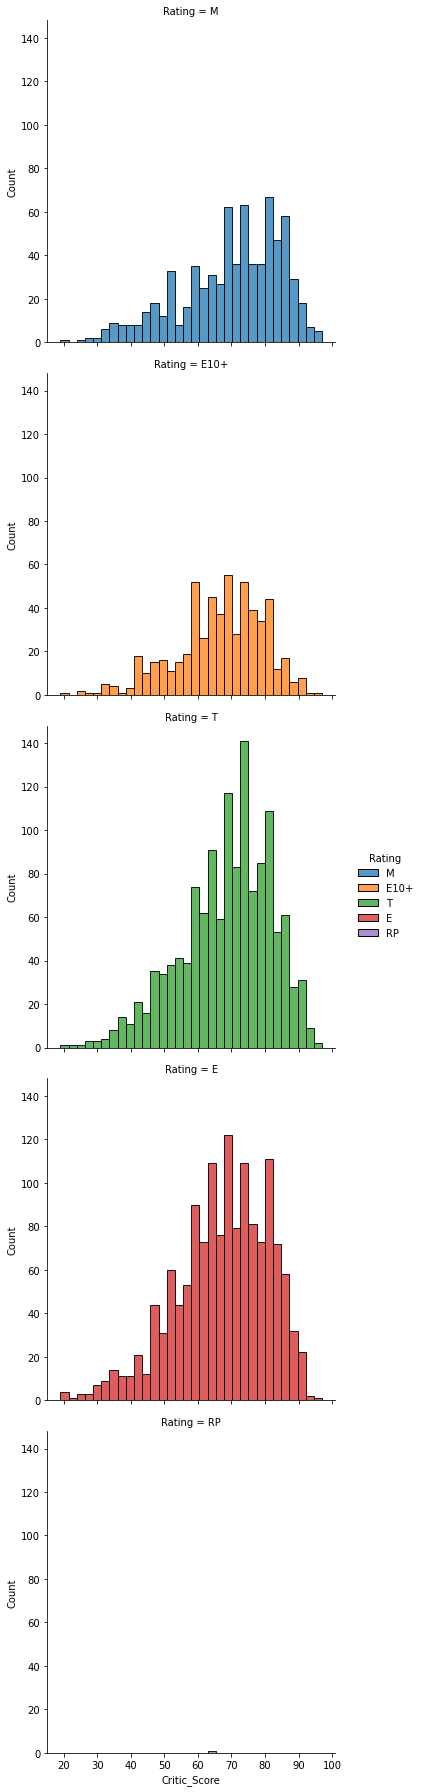

In [26]:
sns.displot(data = train, x = 'Critic_Score', hue = 'Rating', row = 'Rating')

## Takeaways

- most rating groups appear skewed to the left

- RP may need to be removed 

# Q4

## Is Global Sales related to Critic Score?

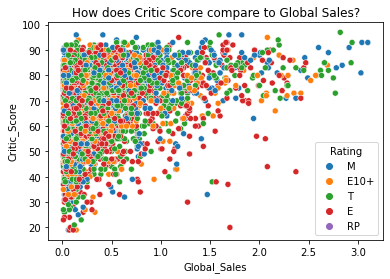

In [27]:
sns.scatterplot(x='Global_Sales', y='Critic_Score',
               data=train, hue='Rating')
plt.title("How does Critic Score compare to Global Sales?")
plt.show()

In [28]:
H0 = 'There is no correlation between Critic Scores and Global Sales'

H1 = 'There is a correlation between Critic Scores and Global Sales'

alpha = .05

In [29]:
corr, p = stats.pearsonr(train.Critic_Score, train.Global_Sales)
corr, p

(0.31967327428834447, 6.73196914911497e-98)

In [30]:
if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

There is a correlation between Critic Scores and Global Sales


## Takeaways

- Games that sell well tend to have higher Critic Scores

- Not all games with high Critic Scores sell well though

- We can conclude that Critic Score and Global Sales are related 

# Q5

## Is Year of Release related to Critic Score?

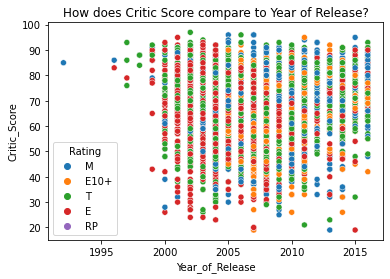

In [31]:
sns.scatterplot(x='Year_of_Release', y='Critic_Score',
               data=train, hue='Rating')
plt.title("How does Critic Score compare to Year of Release?")
plt.show()

In [32]:
H0 = 'There is no correlation between Critic Scores and Year of Release'

H1 = 'There is a correlation between Critic Scores and Year of Release'

alpha = .05

In [36]:
corr, p = stats.pearsonr(train.Critic_Score, train.Year_of_Release)
print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.029904975170499164
0.05574026377206827
We fail to reject the null hypothesis


## Takeaways

- Visually there does not seem to be a correlation between the age of a game on it's Critic Score 

- Games released before 2000 all seem to have very high scores, nostalgia? Remasters of only good games?

- We fail to reject the null, but only just barely

# Q6

## Does Critic Count have an impact on Critic Score?

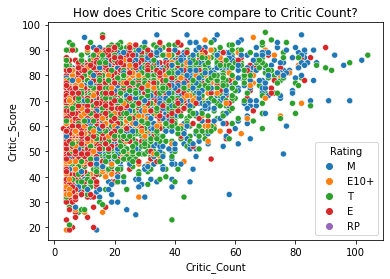

In [37]:
sns.scatterplot(x='Critic_Count', y='Critic_Score',
               data=train, hue='Rating')
plt.title("How does Critic Score compare to Critic Count?")
plt.show()

In [38]:
H0 = 'There is no correlation between Critic Scores and Critic Count'

H1 = 'There is a correlation between Critic Scores and Critic Count'

alpha = .05

In [39]:
corr, p = stats.pearsonr(train.Critic_Score, train.Critic_Count)
print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.3967666448657434
2.140532726185601e-154
There is a correlation between Critic Scores and Critic Count


## Takeaways

- Games with high Critic counts tend to have higher Critic Scores

- Games with high Critic scores don't always have high Critic counts

- we can conclude there is a relationship between critic count and scores

# Q7

## Does User Score correlate with Critic Score?

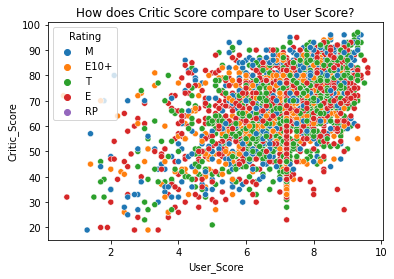

In [40]:
sns.scatterplot(x='User_Score', y='Critic_Score',
               data=train, hue='Rating')
plt.title("How does Critic Score compare to User Score?")
plt.show()

In [41]:
H0 = 'There is no correlation between Critic Scores and User Score'

H1 = 'There is a correlation between Critic Scores and User Score'

alpha = .05

In [42]:
corr, p = stats.pearsonr(train.Critic_Score, train.User_Score)
print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
3.186293980545548e-290
There is a correlation between Critic Scores and User Score


## Takeaways

- Definately a strong visual correlation between Critic Score and User Score

- We can confirm there is a relationship 

# Feature Engineering

### Select K Best

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression

In [49]:
# parameters: f_regression stats test, give me 5 features
f_selector = SelectKBest(f_regression, k=5)

In [50]:
# find the top 5 X's correlated with y
f_selector.fit(train_scaled, y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x7fc069e1c670>)

In [51]:
# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

In [53]:
# get list of top K features. 
f_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature

['NA_Sales', 'EU_Sales', 'Global_Sales', 'Critic_Count', 'User_Score']

### Recursive Feature Elimination

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [55]:
# initialize the ML algorithm
lm = LinearRegression()

In [56]:
# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 5)

In [57]:
# fit the data using RFE
rfe.fit(train_scaled,y_train)  

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [58]:
# get the mask of the columns selected
feature_mask = rfe.support_

In [59]:
# get list of the column names. 
rfe_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

rfe_feature

['Global_Sales', 'Critic_Count', 'User_Score', 'DC', 'PC']

In [60]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')

,Var,Rank
13,PC,1
5,Global_Sales,1
6,Critic_Count,1
7,User_Score,1
9,DC,1
24,XOne,2
40,RP,3
34,Sports,4
20,Wii,5
0,Year_of_Release,6


# Cluster Modeling

### f_features

In [68]:
# assign variable we will use in our model

X = train_scaled[['NA_Sales', 'EU_Sales', 'Global_Sales', 'Critic_Count', 'User_Score']]

In [69]:
X.head()

,NA_Sales,EU_Sales,Global_Sales,Critic_Count,User_Score
0,0.03,0.05,0.04,0.16,0.58
1,0.43,0.34,0.42,0.34,0.57
2,0.29,0.73,0.53,0.60,0.86
3,0.22,0.32,0.36,0.75,0.90
4,0.26,0.40,0.33,0.19,0.92


In [70]:
X.corr()

,NA_Sales,EU_Sales,Global_Sales,Critic_Count,User_Score
NA_Sales,1.00,0.59,0.93,0.33,0.10
EU_Sales,0.59,1.00,0.83,0.37,0.06
Global_Sales,0.93,0.83,1.00,0.40,0.11
Critic_Count,0.33,0.37,0.40,1.00,0.17
User_Score,0.10,0.06,0.11,0.17,1.00


In [72]:
from sklearn.cluster import KMeans


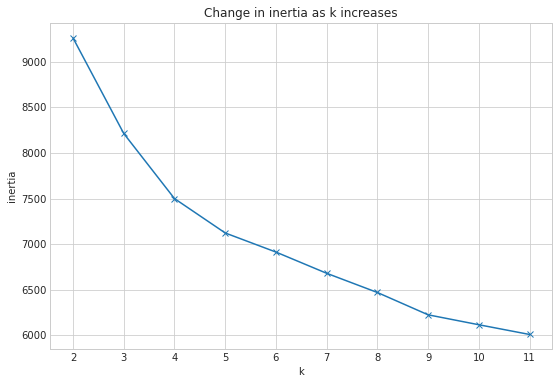

In [73]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [74]:
## an appropriate k would be 6

kmeans = KMeans(n_clusters=6)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
train['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [75]:
train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T,cluster
9854,PS2,2003,Action,0.06,0.05,0.00,0.02,0.12,65.00,19.00,...,0,0,0,0,0,0,1,0,0,4
1478,X360,2013,Platform,0.86,0.34,0.00,0.12,1.32,83.00,37.00,...,0,0,0,0,0,1,0,0,0,3
1114,PS3,2007,Action,0.57,0.72,0.06,0.29,1.65,79.00,64.00,...,0,0,0,0,0,0,0,0,1,3
1846,WiiU,2013,Strategy,0.44,0.32,0.29,0.07,1.11,87.00,79.00,...,0,0,1,0,0,1,0,0,0,3
1982,PS2,2003,Sports,0.51,0.40,0.00,0.13,1.04,81.00,22.00,...,0,1,0,0,1,0,0,0,0,2


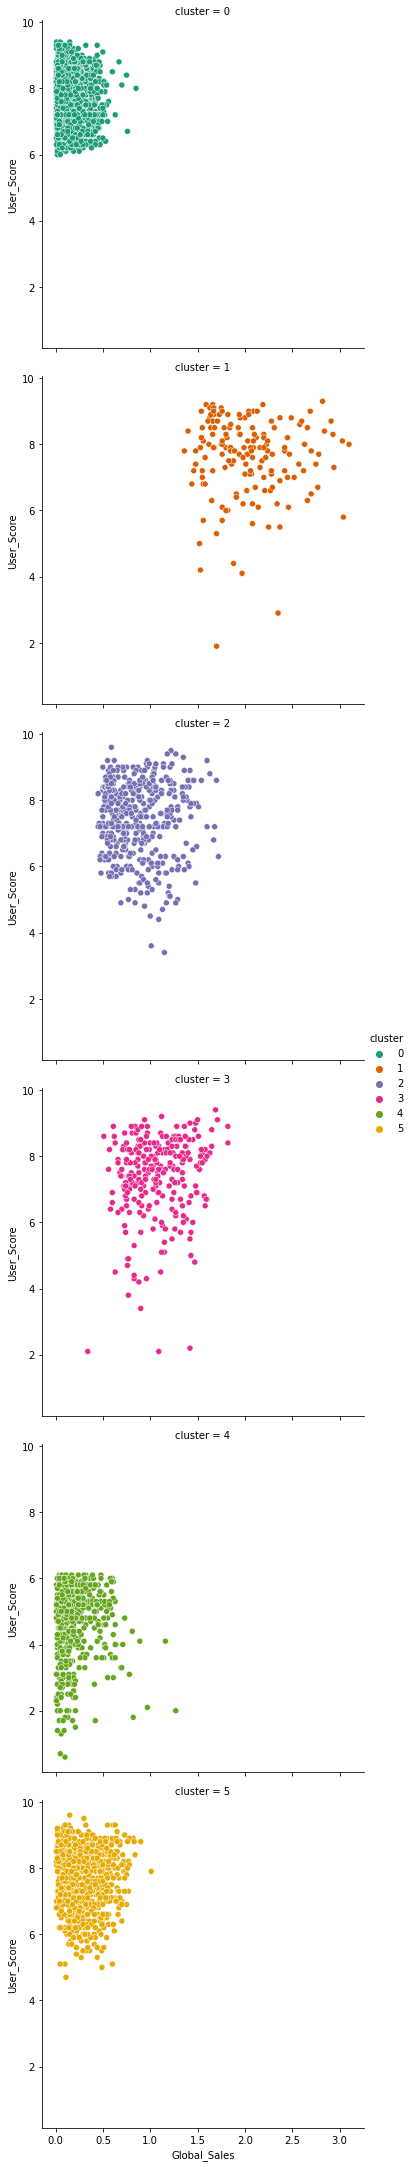

In [79]:
sns.relplot(data=train, x='Global_Sales', y='User_Score', hue='cluster', row = 'cluster', palette= 'Dark2')

<AxesSubplot:xlabel='cluster', ylabel='Critic_Score'>

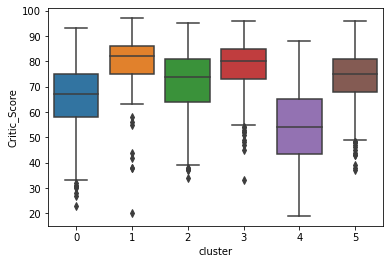

In [81]:
sns.boxplot(y=train.Critic_Score, x=train.cluster)

In [82]:
train.groupby('Rating').cluster.value_counts()

Rating  cluster
E       0          787
        2          215
        4          191
        5          146
        1           55
        3           44
E10+    0          283
        4           93
        5           87
        2           63
        1           27
        3           26
M       5          237
        0          179
        3          106
        4          104
        2           66
        1           36
RP      0            1
T       0          600
        5          342
        4          143
        2          129
        3           86
        1           47
Name: cluster, dtype: int64

#### Statistical Test

- Cluster 0

In [83]:
H0 = 'There is no difference in the Critic Scores between Cluster 0 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 0 and the general population'

alpha = .05

In [85]:
cluster0 = train[train.cluster == 0]

μ = train.Critic_Score.mean()
xbar = cluster0.Critic_Score.mean()
s = cluster0.Critic_Score.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
1.9999999999927658
We fail to reject the null hypothesis


- Cluster 1

In [86]:
H0 = 'There is no difference in the Critic Scores between Cluster 1 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 1 and the general population'

alpha = .05

In [87]:
cluster1 = train[train.cluster == 1]

μ = train.Critic_Score.mean()
xbar = cluster1.Critic_Score.mean()
s = cluster1.Critic_Score.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
6.468046093858332e-29
There is a difference in the Critic Scores between Cluster 1 and the general population


In [88]:
cluster1.shape

(165, 47)

- Cluster 2

In [89]:
H0 = 'There is no difference in the Critic Scores between Cluster 2 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 2 and the general population'

alpha = .05

In [90]:
cluster2 = train[train.cluster == 2]

μ = train.Critic_Score.mean()
xbar = cluster2.Critic_Score.mean()
s = cluster2.Critic_Score.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
7.416399831318491e-13
There is a difference in the Critic Scores between Cluster 2 and the general population


In [91]:
cluster2.shape

(473, 47)

- Cluster 3

In [92]:
H0 = 'There is no difference in the Critic Scores between Cluster 3 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 3 and the general population'

alpha = .05

In [93]:
cluster3 = train[train.cluster == 3]

μ = train.Critic_Score.mean()
xbar = cluster3.Critic_Score.mean()
s = cluster3.Critic_Score.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
1.406866995137246e-37
There is a difference in the Critic Scores between Cluster 3 and the general population


In [94]:
cluster3.shape

(262, 47)

- Cluster 4

In [95]:
H0 = 'There is no difference in the Critic Scores between Cluster 4 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 4 and the general population'

alpha = .05

In [96]:
cluster4 = train[train.cluster == 4]

μ = train.Critic_Score.mean()
xbar = cluster4.Critic_Score.mean()
s = cluster4.Critic_Score.std()
n = cluster4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
2.0
We fail to reject the null hypothesis


- Cluster 5

In [97]:
H0 = 'There is no difference in the Critic Scores between Cluster 5 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 5 and the general population'

alpha = .05

In [98]:
cluster5 = train[train.cluster == 5]

μ = train.Critic_Score.mean()
xbar = cluster5.Critic_Score.mean()
s = cluster5.Critic_Score.std()
n = cluster5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
4.8626071075365464e-49
There is a difference in the Critic Scores between Cluster 5 and the general population


In [99]:
cluster5.shape

(812, 47)

## Takeaways

- Half the clusters in this model have a significant difference in Critic Score

- Cluster 5, which has a significant differnce, makes up 20% of the train dataframe

- Cluster 5 appears to be games that have high User Scores, but did not sell very well
    - Cult Classics?
    
- All clusters with significant difference have high User Scores

### rfe_features

In [100]:
# assign variable we will use in our model

X = train_scaled[rfe_feature]

In [101]:
X.head()

,Global_Sales,Critic_Count,User_Score,DC,PC
0,0.04,0.16,0.58,0.00,0.00
1,0.42,0.34,0.57,0.00,0.00
2,0.53,0.60,0.86,0.00,0.00
3,0.36,0.75,0.90,0.00,0.00
4,0.33,0.19,0.92,0.00,0.00


In [102]:
X.corr()

,Global_Sales,Critic_Count,User_Score,DC,PC
Global_Sales,1.00,0.40,0.11,-0.01,-0.13
Critic_Count,0.40,1.00,0.17,-0.02,0.04
User_Score,0.11,0.17,1.00,0.05,-0.02
DC,-0.01,-0.02,0.05,1.00,-0.01
PC,-0.13,0.04,-0.02,-0.01,1.00


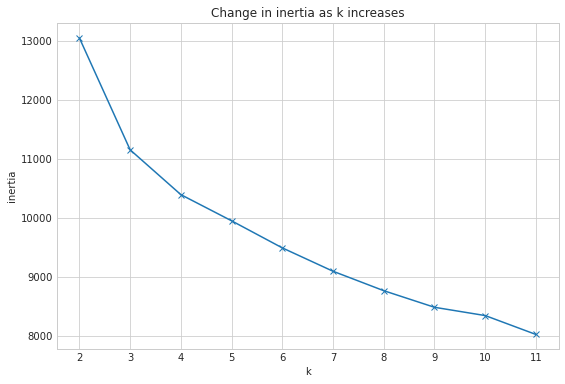

In [103]:

#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [104]:
## an appropriate k would be 4

kmeans = KMeans(n_clusters=4)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
train['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [105]:
train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T,cluster
9854,PS2,2003,Action,0.06,0.05,0.00,0.02,0.12,65.00,19.00,...,0,0,0,0,0,0,1,0,0,2
1478,X360,2013,Platform,0.86,0.34,0.00,0.12,1.32,83.00,37.00,...,0,0,0,0,0,1,0,0,0,3
1114,PS3,2007,Action,0.57,0.72,0.06,0.29,1.65,79.00,64.00,...,0,0,0,0,0,0,0,0,1,3
1846,WiiU,2013,Strategy,0.44,0.32,0.29,0.07,1.11,87.00,79.00,...,0,0,1,0,0,1,0,0,0,3
1982,PS2,2003,Sports,0.51,0.40,0.00,0.13,1.04,81.00,22.00,...,0,1,0,0,1,0,0,0,0,0


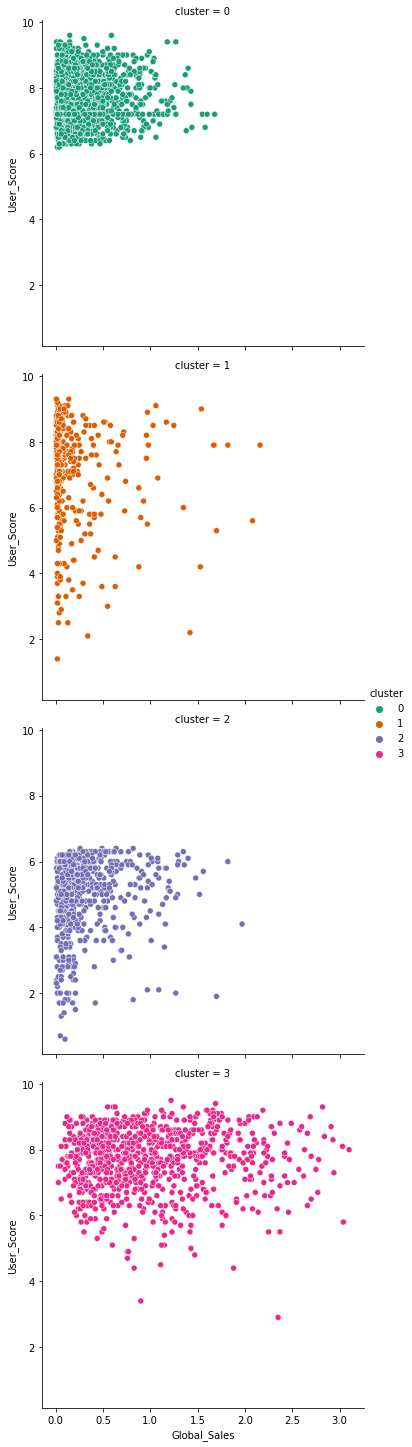

In [106]:
sns.relplot(data=train, x='Global_Sales', y='User_Score', hue='cluster', row = 'cluster', palette= 'Dark2')

#### Statistical Testing

- Cluster 0

In [107]:
H0 = 'There is no difference in the Critic Scores between Cluster 0 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 0 and the general population'

alpha = .05

In [108]:
cluster0 = train[train.cluster == 0]

μ = train.Critic_Score.mean()
xbar = cluster0.Critic_Score.mean()
s = cluster0.Critic_Score.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
1.9999685222370687
We fail to reject the null hypothesis


- Cluster 1

In [109]:
H0 = 'There is no difference in the Critic Scores between Cluster 1 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 1 and the general population'

alpha = .05

In [110]:
cluster1 = train[train.cluster == 1]

μ = train.Critic_Score.mean()
xbar = cluster1.Critic_Score.mean()
s = cluster1.Critic_Score.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
2.1003247703541694e-37
There is a difference in the Critic Scores between Cluster 1 and the general population


In [111]:
cluster1.shape

(364, 47)

- Cluster 2

In [112]:
H0 = 'There is no difference in the Critic Scores between Cluster 2 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 2 and the general population'

alpha = .05

In [113]:
cluster1 = train[train.cluster == 2]

μ = train.Critic_Score.mean()
xbar = cluster2.Critic_Score.mean()
s = cluster2.Critic_Score.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
7.416399831318491e-13
There is a difference in the Critic Scores between Cluster 2 and the general population


In [114]:
cluster2.shape

(473, 47)

- Cluster 3

In [115]:
H0 = 'There is no difference in the Critic Scores between Cluster 3 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 3 and the general population'

alpha = .05

In [116]:
cluster1 = train[train.cluster == 3]

μ = train.Critic_Score.mean()
xbar = cluster3.Critic_Score.mean()
s = cluster3.Critic_Score.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
1.406866995137246e-37
There is a difference in the Critic Scores between Cluster 3 and the general population


In [117]:
cluster3.shape

(262, 47)

## Takeaways

- While several clusters reject the null, the clusters account for less data than the Select K Best cluster

- This does not appear to out perform the first model

### Best of both Feature Engineering

In [118]:
f_feature

['NA_Sales', 'EU_Sales', 'Global_Sales', 'Critic_Count', 'User_Score']

In [119]:
rfe_feature

['Global_Sales', 'Critic_Count', 'User_Score', 'DC', 'PC']

In [120]:

# assign variable we will use in our model

X = train_scaled[['Global_Sales', 'Critic_Count', 'User_Score']]

## these features were chosen by both Select K Best and RFE


In [121]:
X.head()

,Global_Sales,Critic_Count,User_Score
0,0.04,0.16,0.58
1,0.42,0.34,0.57
2,0.53,0.60,0.86
3,0.36,0.75,0.90
4,0.33,0.19,0.92


In [122]:
X.corr()

,Global_Sales,Critic_Count,User_Score
Global_Sales,1.00,0.40,0.11
Critic_Count,0.40,1.00,0.17
User_Score,0.11,0.17,1.00


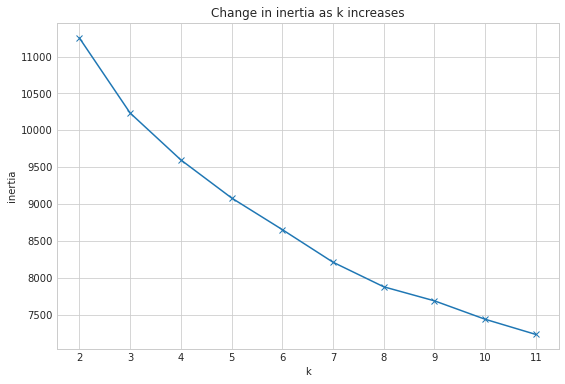

In [123]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [124]:
## an appropriate k would be 7

kmeans = KMeans(n_clusters=7)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
train['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [125]:
train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T,cluster
9854,PS2,2003,Action,0.06,0.05,0.00,0.02,0.12,65.00,19.00,...,0,0,0,0,0,0,1,0,0,1
1478,X360,2013,Platform,0.86,0.34,0.00,0.12,1.32,83.00,37.00,...,0,0,0,0,0,1,0,0,0,6
1114,PS3,2007,Action,0.57,0.72,0.06,0.29,1.65,79.00,64.00,...,0,0,0,0,0,0,0,0,1,4
1846,WiiU,2013,Strategy,0.44,0.32,0.29,0.07,1.11,87.00,79.00,...,0,0,1,0,0,1,0,0,0,4
1982,PS2,2003,Sports,0.51,0.40,0.00,0.13,1.04,81.00,22.00,...,0,1,0,0,1,0,0,0,0,6


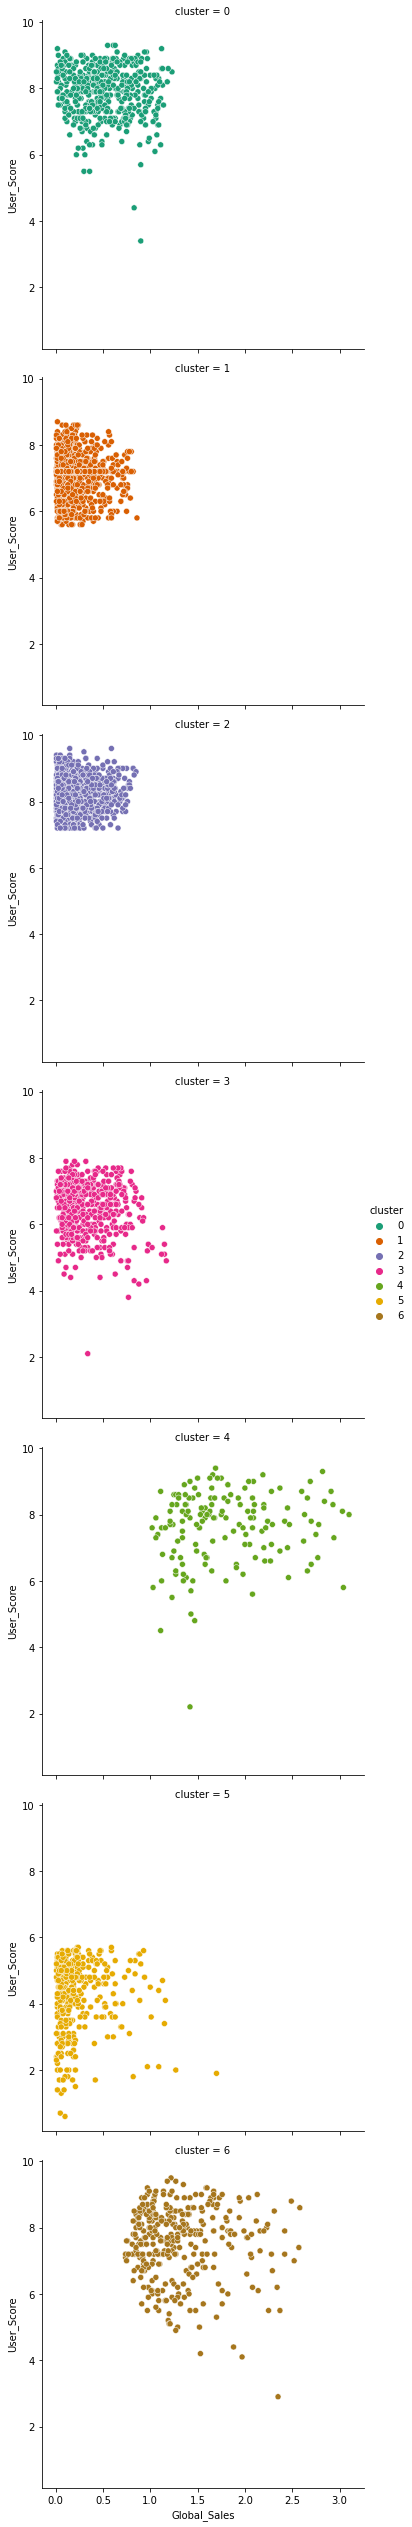

In [127]:
sns.relplot(data=train, x='Global_Sales', y='User_Score', hue='cluster', row = 'cluster', palette= 'Dark2')

#### Statistical Testing

- Cluster 0

In [128]:
H0 = 'There is no difference in the Critic Scores between Cluster 0 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 0 and the general population'

alpha = .05

In [129]:
cluster0 = train[train.cluster == 0]

μ = train.Critic_Score.mean()
xbar = cluster0.Critic_Score.mean()
s = cluster0.Critic_Score.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
7.341005695459178e-84
There is a difference in the Critic Scores between Cluster 0 and the general population


In [131]:
cluster0.shape

(457, 47)

- Cluster 1

In [132]:
H0 = 'There is no difference in the Critic Scores between Cluster 1 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 1 and the general population'

alpha = .05

In [133]:
cluster1 = train[train.cluster == 1]

μ = train.Critic_Score.mean()
xbar = cluster1.Critic_Score.mean()
s = cluster1.Critic_Score.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
2.0
We fail to reject the null hypothesis


- Cluster 2

In [134]:
H0 = 'There is no difference in the Critic Scores between Cluster 2 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 2 and the general population'

alpha = .05

In [135]:
cluster2 = train[train.cluster == 2]

μ = train.Critic_Score.mean()
xbar = cluster2.Critic_Score.mean()
s = cluster2.Critic_Score.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
1.5119255118650614e-58
There is a difference in the Critic Scores between Cluster 2 and the general population


In [136]:
cluster2.shape

(904, 47)

- Cluster 3

In [137]:
H0 = 'There is no difference in the Critic Scores between Cluster 3 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 3 and the general population'

alpha = .05

In [138]:
cluster3 = train[train.cluster == 3]

μ = train.Critic_Score.mean()
xbar = cluster3.Critic_Score.mean()
s = cluster3.Critic_Score.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
1.9999884842741635
We fail to reject the null hypothesis


- Cluster 4

In [139]:
H0 = 'There is no difference in the Critic Scores between Cluster 4 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 4 and the general population'

alpha = .05

In [140]:
cluster4 = train[train.cluster == 4]

μ = train.Critic_Score.mean()
xbar = cluster4.Critic_Score.mean()
s = cluster4.Critic_Score.std()
n = cluster4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(corr)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

0.5261058311492219
2.56638251289595e-42
There is a difference in the Critic Scores between Cluster 4 and the general population


In [141]:
cluster4.shape

(156, 47)

- Cluster 5